<a href="https://colab.research.google.com/github/nambiar/MachineLearning/blob/master/Session4/DigitDetector3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using more number of epochs and dropouts and learning rate scheduler to increase the accuracy to 99.4 

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


(60000, 28, 28)


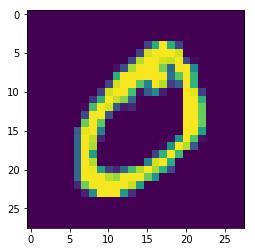

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Using the learning rate has no affect on the accuracy and increased the training time from 3s to 5s and even after 20 epoch no change ? Is it due to overfitting as I see sometimes the accuracy does reach 99.3 and then drops
Same goes for the dropout . Though theoretically 0.1 ratio of dropout is used but is there any relation between layers or type of layers and dropout to be used.

As the model seemed overfitting tried reducing the kernels as there is dropout and during tarining it shall increase the accuracy to achieve following

Total params: 15,552
Trainable params: 15,404
Non-trainable params: 148
[0.02849856537766177, 0.9933]
Decreased the epoch from 20 to 10 to get accuracy of 0.9938

After working around learning rates with batch size of 128 & 512 , found that for 512 learning rate of 0.001 work fine and hence using it . But one point to notice here that increasing epoch might induce or make accuracy dip once it reaches max .

In [33]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26 #3
model.add(BatchNormalization())
model.add(Dropout(0.1))



model.add(Convolution2D(16, 3, 3, activation='relu'))# input_shape=(28,28,1))) # 24
model.add(BatchNormalization())
model.add(Dropout(0.1))

#model.add(Convolution2D(16, 1, activation='relu')) #24*24*16
#model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) # 12

model.add(Convolution2D(16, 3, 3, activation='relu'))# input_shape=(28,28,1))) # 10
model.add(BatchNormalization())
model.add(Dropout(0.1))

#model.add(Convolution2D(32, 3, 3, activation='relu'))# input_shape=(28,28,1))) # 8
model.add(Convolution2D(32, 3, 3, activation='relu'))# input_shape=(28,28,1))) # 8
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 1, activation='relu')) 
#model.add(BatchNormalization())

model.add(Convolution2D(10, 8))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_39 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_33 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_40 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_34 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 16)        0         
__________

In [38]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.001 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=512, epochs=10, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10

Epoch 00001: LearningRateScheduler setting learning rate to 0.001.
60000/60000 [==============================] - 9s 143us/step - loss: 0.0073 - acc: 0.9975 - val_loss: 0.0278 - val_acc: 0.9932
Epoch 2/10

Epoch 00002: LearningRateScheduler setting learning rate to 0.0007581501.
60000/60000 [==============================] - 3s 44us/step - loss: 0.0055 - acc: 0.9981 - val_loss: 0.0275 - val_acc: 0.9932
Epoch 3/10

Epoch 00003: LearningRateScheduler setting learning rate to 0.0006105006.
60000/60000 [==============================] - 3s 44us/step - loss: 0.0063 - acc: 0.9979 - val_loss: 0.0261 - val_acc: 0.9932
Epoch 4/10

Epoch 00004: LearningRateScheduler setting learning rate to 0.0005109862.
60000/60000 [==============================] - 3s 43us/step - loss: 0.0051 - acc: 0.9983 - val_loss: 0.0258 - val_acc: 0.9931
Epoch 5/10

Epoch 00005: LearningRateScheduler setting learning rate to 0.0004393673.
60000/60000 [=========

In [39]:

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.023938909288748117, 0.9942]
